In [144]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from twitenv import (CONSUMER_KEY,
                    CONSUMER_SECRET,
                    ACCESS_TOKEN,
                    ACCESS_LEVEL)


# Twitter API Keys
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_LEVEL)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())


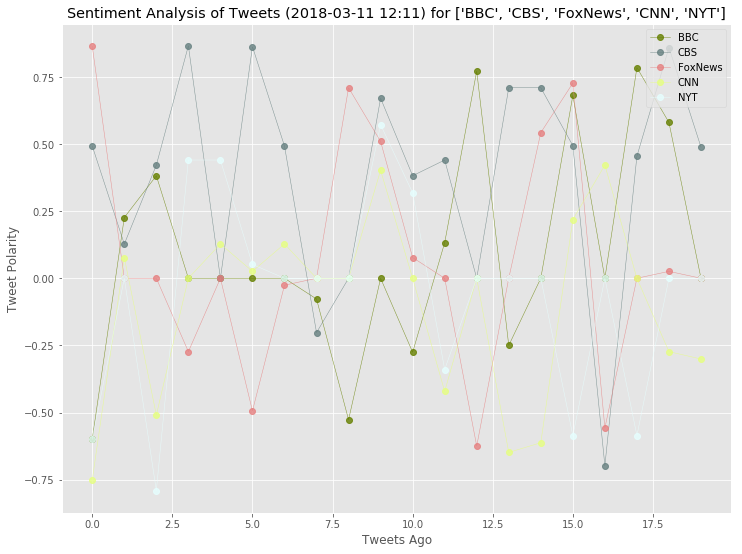

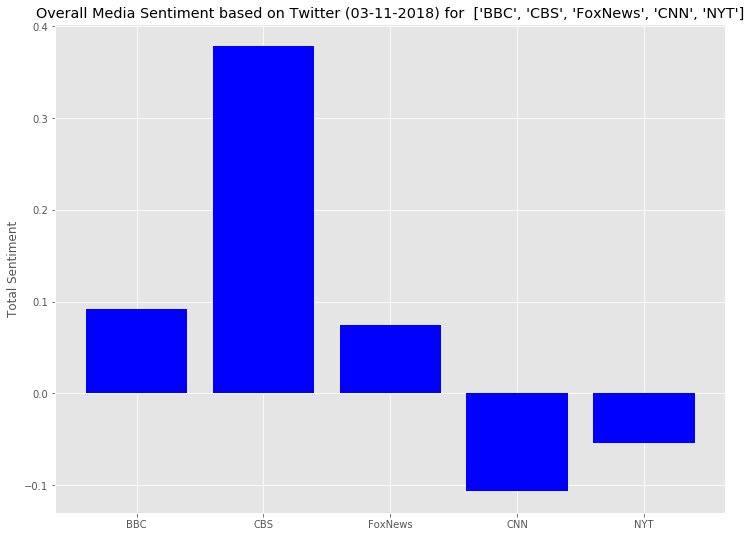

In [145]:
news_org = ['BBC','CBS','FoxNews', 'CNN', 'NYT']
totals_org = [0.0] * len(news_org)
org_counter = 1
red = 0.4
green = 0.0
blue = 0.0
color = 0.5
title = ""

# Create the figure size for the plots

# Get current size
fig_size = plt.rcParams["figure.figsize"]

 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

#Loop through the new agencies
for n in news_org:
    
    # Set the colors for the scatter plots
    if org_counter % 3 == 0:
        red = red + color
    if org_counter % 3 == 1:
        blue = blue + color
    if org_counter % 3 == 2:
        green = green + color
    if red > 1.0:
        red = 0.0
    if green > 1.0:
        green = 0.0
    if blue > 1.0:
        blue = 0.0

    counter = 1

# Variables for holding sentiments
    sentiments = []
    oldest_tweet = None

# Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):

    # Get all tweets from home feed
        public_tweets = api.user_timeline(n, count=20, max_id=oldest_tweet)
        
    # Process all the tweets and arrive at sentiment scores
    for tweet in public_tweets:


        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter

    # Add sentiments for each tweet into an array
        sentiments.append({"Date": tweet["created_at"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})

    # Add to counter

        counter = counter + 1

    # Create data frame for sentiments
    sentiments_pd = pd.DataFrame.from_dict(sentiments)
    sentiments_pd.head()
    
    #Total all sentiments for all agencies
    sum = 0.0
    for j in range(len(sentiments_pd["Compound"])):
        sum = sum + sentiments_pd["Compound"][j]
       # print (sum)
    #Arrive at the average/sentiment for each news agency
    
    totals_org[org_counter-1]  = sum/len(sentiments_pd["Compound"])

    plt.plot(np.arange(len(sentiments_pd["Compound"])),
                           sentiments_pd["Compound"], color = (red,blue,green), marker="o", linewidth=0.5,
                           alpha=0.8)
    
# Increment outer loop for process all news agencies  
    org_counter = org_counter + 1
# Set the title, x, y labels for scatter plot
plt.legend(news_org, loc='upper right')
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
bar_now = datetime.now()
bar_now = bar_now.strftime("%m-%d-%Y")
plt.title("Sentiment Analysis of Tweets ({}) for {}".format(now,news_org))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.savefig("SentimentsAnalysisMediaTweets.png")

plt.show()

# Create structure for bar plot
tuple_org = ()
for k in range(len(news_org)):
    tuple_org = tuple_org + (totals_org[k],)

plt.bar(np.arange(len(news_org)),tuple_org, color = 'b')
plt.ylabel("Total Sentiment")
plt.xticks(np.arange(len(news_org)),news_org)
plt.title("Overall Media Sentiment based on Twitter ({}) for  {}".format(bar_now, news_org))

plt.savefig("OverallSentimentsAnalysisMediaTweets.png")

plt.show()


In [79]:
#sentiments_pd.plot(x=news_org , y=sentiments_pd["Compound"], kind='bar')